In [4]:
import pandas as pd
import scipy.stats
import numpy as np
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/data/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
# Task 1

In [6]:
# http://programmerz.ru/questions/18710/implementing-a-kolmogorov-smirnov-test-in-python-scipy-question

In [7]:
n = scipy.stats.norm.rvs(size=10000)

In [8]:
scipy.stats.kstest(n, cdf=scipy.stats.norm(*scipy.stats.norm.fit(n)).cdf)

KstestResult(statistic=0.004525174104403673, pvalue=0.9866051421970805)

In [9]:
# https://archive.ics.uci.edu/ml/datasets/wine
data = pd.read_csv('./Data/wine.data', header=None)

In [10]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [11]:
ash = data[4]

In [12]:
ash_sorted = np.sort(ash)

In [13]:
ash__ = pd.Series(ash).where(lambda x: x < 28.0).dropna()

In [14]:
ash_ = pd.Series(ash__).where(lambda x: x > 11.0).dropna()

((array([-2.65412821, -2.33971234, -2.16005012, -2.03115788, -1.92917474,
         -1.8440259 , -1.77046592, -1.70540053, -1.64684485, -1.59344618,
         -1.54423949, -1.49851108, -1.45571758, -1.41543532, -1.37732726,
         -1.34112065, -1.30659153, -1.27355359, -1.24185014, -1.21134802,
         -1.18193311, -1.15350678, -1.12598321, -1.09928719, -1.07335245,
         -1.04812026, -1.02353831, -0.9995598 , -0.97614265, -0.95324891,
         -0.9308442 , -0.90889727, -0.88737963, -0.86626522, -0.84553011,
         -0.82515232, -0.80511155, -0.78538904, -0.76596741, -0.74683049,
         -0.72796326, -0.70935167, -0.69098262, -0.67284382, -0.65492375,
         -0.63721158, -0.61969709, -0.60237068, -0.58522325, -0.5682462 ,
         -0.55143137, -0.53477104, -0.51825784, -0.50188478, -0.48564517,
         -0.46953264, -0.45354111, -0.43766473, -0.42189791, -0.40623529,
         -0.3906717 , -0.37520218, -0.35982193, -0.34452634, -0.32931093,
         -0.31417138, -0.29910351, -0.

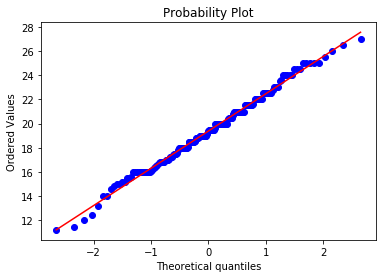

In [15]:
scipy.stats.probplot(ash_, dist='norm', plot=pylab)

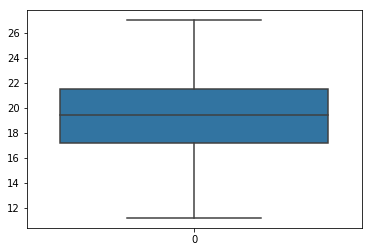

In [16]:
sns.boxplot(data=ash_)

/data/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


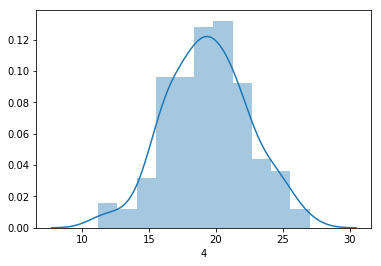

In [17]:
sns.distplot(ash_)

In [18]:
scipy.stats.kstest(ash_, cdf=scipy.stats.norm(*scipy.stats.norm.fit(ash_)).cdf)

KstestResult(statistic=0.05195949098417796, pvalue=0.755491677764502)

In [19]:
scipy.stats.anderson(ash_)

AndersonResult(statistic=0.33035404477112706, critical_values=array([0.564, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [20]:
scipy.stats.shapiro(ash_)

(0.9930391311645508, 0.575249433517456)

In [21]:
# Task 2

In [22]:
d = pd.read_csv('./Data/train_normal.csv')

In [23]:
columns = list(d.columns.values)

In [24]:
total = d['TotalBsmtSF']

In [25]:
grl = d['GrLivArea']

In [26]:
total_sorted = np.sort(total)

In [27]:
total__ = pd.Series(total).where(lambda x: x > 300.0).dropna()

In [28]:
total_ = pd.Series(total__).where(lambda x: x < 2200.0).dropna()

/data/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


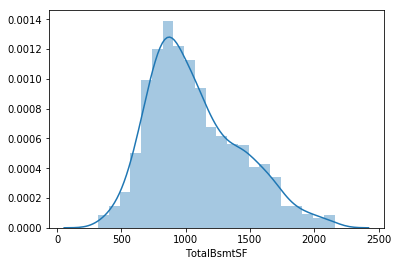

In [29]:
sns.distplot(total_)

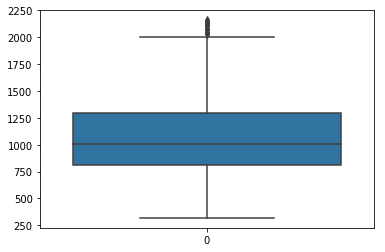

In [30]:
sns.boxplot(data=total_)

((array([-3.29376437, -3.03573294, -2.89218876, ...,  2.89218876,
          3.03573294,  3.29376437]),
  array([ 319.,  360.,  372., ..., 2136., 2153., 2158.])),
 (347.9292064617357, 1071.3815977175464, 0.9816532898158306))

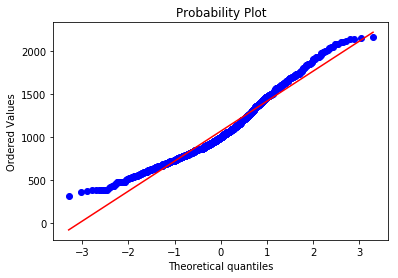

In [31]:
scipy.stats.probplot(total_, dist='norm', plot=pylab)


((array([-3.00065903, -2.73434424, -2.58594185, ...,  4.12598409,
          4.3609451 ,  4.80573142]),
  array([ 319.,  360.,  372., ..., 2136., 2153., 2158.])),
 (312.8352254856841, 915.027111732199, 0.986255261860408))

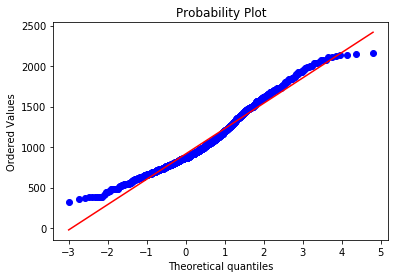

In [32]:
scipy.stats.probplot(total_, dist='exponnorm', plot=pylab, sparams=(0.5,))

((array([ 6.80623563,  7.06426706,  7.20781124, ..., 12.99218876,
         13.13573294, 13.39376437]),
  array([ 319.,  360.,  372., ..., 2136., 2153., 2158.])),
 (347.9292064617356, -2442.703387545983, 0.9816532898158304))

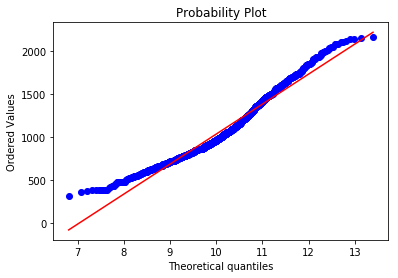

In [33]:
scipy.stats.probplot(total_, dist='foldnorm', plot=pylab, sparams=(10.1,))

In [34]:
scipy.stats.kstest(total_, cdf=scipy.stats.norm(*scipy.stats.norm.fit(total_)).cdf)

KstestResult(statistic=0.08230871748518154, pvalue=1.0375193371103819e-08)

In [55]:
scipy.stats.shapiro(total_)

(0.9630330204963684, 2.032082291685279e-18)

In [56]:
scipy.stats.anderson(total_)

AndersonResult(statistic=17.168822879325944, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [36]:
#

In [40]:
grl_sorted = np.sort(grl)

In [41]:
grl_sorted

array([ 334,  438,  480, ..., 4476, 4676, 5642])

In [42]:
grl__ = pd.Series(grl).where(lambda x: x > 500.0).dropna()

In [51]:
grl_ = pd.Series(grl__).where(lambda x: x < 3000.0).dropna()

/data/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


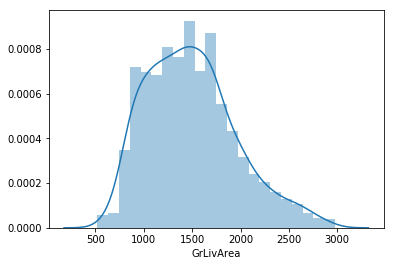

In [52]:
sns.distplot(grl_)

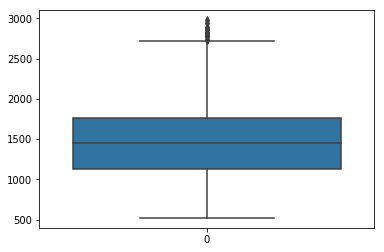

In [53]:
sns.boxplot(data=grl_)

((array([-3.30107788, -3.04357694, -2.90036041, ...,  2.90036041,
          3.04357694,  3.30107788]),
  array([ 520.,  605.,  616., ..., 2898., 2945., 2978.])),
 (458.5401714933779, 1491.3578874218208, 0.9860602740058209))

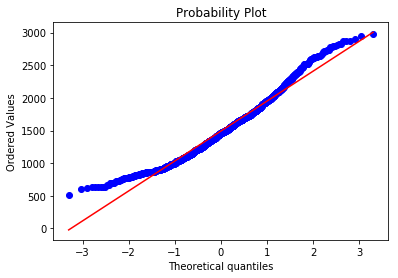

In [54]:
scipy.stats.probplot(grl_, dist='norm', plot=pylab)

((array([-3.00819936, -2.74244839, -2.59439514, ...,  4.13912996,
          4.37403554,  4.81877251]),
  array([ 520.,  605.,  616., ..., 2898., 2945., 2978.])),
 (412.0936253669052, 1285.3924558602862, 0.9902229276096196))

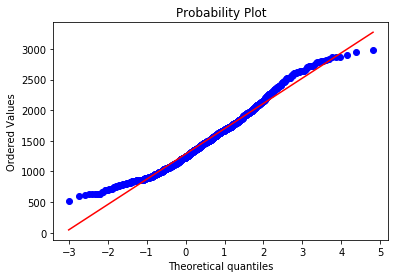

In [62]:
scipy.stats.probplot(grl_, dist='exponnorm', plot=pylab, sparams=(0.5,))

In [63]:
scipy.stats.shapiro(grl_)

(0.9717264771461487, 3.4636196299743006e-16)

In [60]:
scipy.stats.anderson(grl_)

AndersonResult(statistic=8.529102871556915, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))